In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


1. Sampling Sidtribution (Central Limit Theorem)

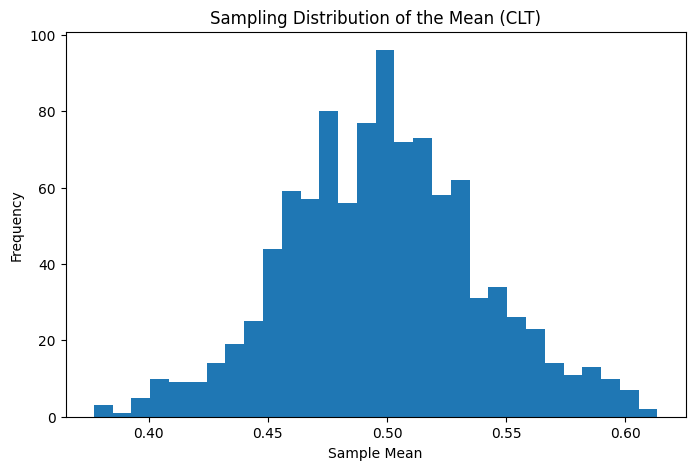

In [2]:
np.random.seed(0)

sample_means = [np.mean(np.random.uniform(0, 1, 50)) for _ in range(1000)]

plt.figure(figsize=(8,5))
plt.hist(sample_means, bins=30)
plt.title("Sampling Distribution of the Mean (CLT)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()


2. Confidence interval for population mean

In [3]:
data = np.random.normal(loc=5, scale=2, size=40)

mean = np.mean(data)
std = np.std(data, ddof=1)
n = len(data)

confidence = 0.95
t_value = stats.t.ppf((1 + confidence) / 2, df=n-1)
margin_error = t_value * (std / np.sqrt(n))

ci_lower = mean - margin_error
ci_upper = mean + margin_error

print("Mean:", mean)
print("95% Confidence Interval:", (ci_lower, ci_upper))


Mean: 4.305724490932556
95% Confidence Interval: (np.float64(3.573324320559352), np.float64(5.038124661305759))


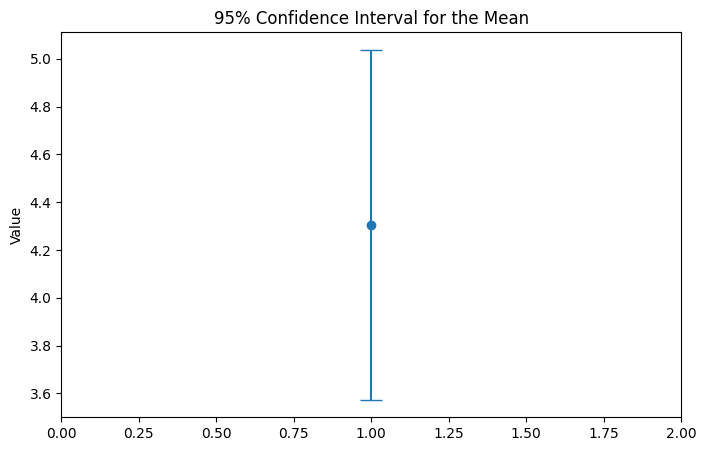

In [5]:
# Visual confidence interval
plt.figure(figsize=(8,5))
plt.errorbar(1, mean, yerr=margin_error, fmt='o', capsize=8)
plt.xlim(0, 2)
plt.title("95% Confidence Interval for the Mean")
plt.ylabel("Value")
plt.show()



3. one-sample t-test

In [6]:
# Test if sample mean is significantly different from 5
t_stat, p_value = stats.ttest_1samp(data, 5)

print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -1.9174009305309672
p-value: 0.06253270870891457


4. two-sample t-test

In [7]:
group1 = np.random.normal(50, 5, 100)
group2 = np.random.normal(52, 5, 100)

t_stat, p_value = stats.ttest_ind(group1, group2)

print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -1.789167880288106
p-value: 0.07511631490554996


5. z-test for large samples

In [8]:
population_std = 10
sample = np.random.normal(100, population_std, 50)

sample_mean = np.mean(sample)
n = len(sample)
mu_0 = 100  # hypothesized mean

z_stat = (sample_mean - mu_0) / (population_std / np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print("z-statistic:", z_stat)
print("p-value:", p_value)


z-statistic: 0.7412419033855117
p-value: 0.4585467803240437


6. chi-square test (goodness of fit)

In [9]:
observed = np.array([25, 15, 30, 30])
expected = np.array([25, 25, 25, 25])

chi_stat = ((observed - expected)**2 / expected).sum()
p_value = 1 - stats.chi2.cdf(chi_stat, df=len(observed)-1)

print("Chi-square statistic:", chi_stat)
print("p-value:", p_value)


Chi-square statistic: 6.0
p-value: 0.11161022509471263


7. ANOVA (comparing 3 group)

In [10]:
g1 = np.random.normal(50, 5, 50)
g2 = np.random.normal(55, 5, 50)
g3 = np.random.normal(53, 5, 50)

f_stat, p_value = stats.f_oneway(g1, g2, g3)

print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 15.329911848858023
p-value: 8.97461722037548e-07


8. Visualizing F-test groups

C:\Users\ppjos\AppData\Local\Temp\ipykernel_22300\2450137697.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g1, g2, g3], labels=['Group 1', 'Group 2', 'Group 3'])


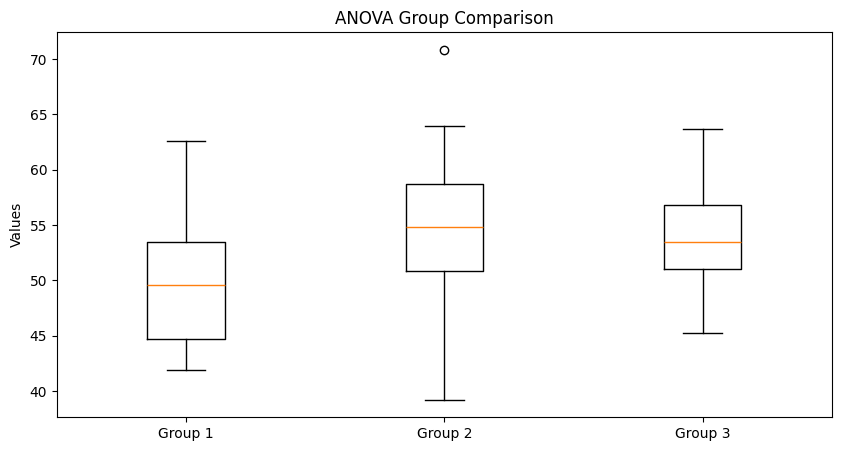

In [11]:
plt.figure(figsize=(10,5))
plt.boxplot([g1, g2, g3], labels=['Group 1', 'Group 2', 'Group 3'])
plt.title("ANOVA Group Comparison")
plt.ylabel("Values")
plt.show()
